In [1]:
import sympy as sym
sym.init_printing()
one = sym.sympify(1)

In [2]:
# Helper functions.
def get_real(expr):
    tmp = sym.collect((expr/e2).expand(),1/e2,exact=True, evaluate=False)[1/e2]
    tmp = sym.collect((tmp/e1).expand(),1/e1,exact=True, evaluate=False)[1/e1]
    return tmp
   
def convert(expr):
    tmp = expr
    for pair in equiv:
        tmp = tmp.replace(pair[0],pair[1])
    return tmp

In [3]:
e1, e2 = sym.symbols("\epsilon_1 \epsilon_2")
fr = sym.symbols('f_r')
fe1, fe2 = sym.symbols('f_{e1} f_{e2}')
fe11, fe12, fe22 = sym.symbols('f_{e11} f_{e12} f_{e22}')
fe111, fe112, fe122, fe222 = sym.symbols('f_{e111} f_{e112} f_{e122} f_{e222} ')

f = sym.symbols('f')
fx, fy = sym.symbols('f_{t} f_{y}')
fxx, fxy, fyy = sym.symbols('f_{tt} f_{ty} f_{yy}')
fxxx, fxxy, fxyy, fyyy = sym.symbols('f_{ttt} f_{tty} f_{tyy} f_{yyy} ')

equiv = [ 
    [fr,f],
    [fe1,fx],
    [fe2,fy],
    [fe11,fxx/2],
    [fe12,fxy],
    [fe22,fyy/2],
    [fe111,fxxx/6],
    [fe112,fxxy/2],
    [fe122,fxyy/2],
    [fe222,fyyy/6],
]

In [4]:
f_oti = fr                                                      # Real
f_oti += (fe1*e1+fe2*e2)                                         # Order 1
f_oti += (fe11*e1**2+fe12*e1*e2+fe22*e2**2)                      # Order 2 
# f_oti += (fe111*e1**3+fe112*e1**2*e2+fe122*e1*e2**2+fe222*e2**3) # Order 3
f_oti

In [5]:
f0_e1 = sym.collect((f_oti/e1).expand(),1/e1,exact=True,evaluate=False)[one]
f0_e2 = sym.collect((f_oti/e2).expand(),1/e2,exact=True,evaluate=False)[one]

In [6]:
f0_e2

In [7]:
f0 = f_oti.copy()

In [14]:
f1 = f0_e1 + f0_e2*get_real(f0)
f1_e1 = sym.collect((f1/e1).expand(),1/e1,exact=True,evaluate=False)[one]
f1_e2 = sym.collect((f1/e2).expand(),1/e2,exact=True,evaluate=False)[one]



In [15]:
f1_e1

In [16]:
f1_e2

In [17]:
f2 = f1_e1 + f1_e2*get_real(f1)

In [18]:
f2

In [19]:
convert(get_real(f0))

In [20]:
convert((get_real(f1)))


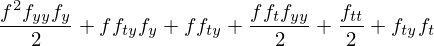

In [21]:
convert(get_real(f2))

In [29]:
t,y = sym.symbols('t, y')


In [32]:
f = sym.Function('f')(y,t)

In [34]:

f1 = sym.diff(f,t)+sym.diff(f,y)


In [80]:


f_tt = "d^2/dt^2(f(t, y(t))) = y''(t) f^(0, 1)(t, y(t)) + y'(t)^2 f^(0, 2)(t, y(t)) + 2 y'(t) f^(1, 1)(t, y(t)) + f^(2, 0)(t, y(t))"
f_ttt = "d^3/dt^3(f(t, y(t))) = y^(3)(t) f^(0, 1)(t, y(t)) + 3 y''(t) f^(1, 1)(t, y(t)) + y'(t)^3 f^(0, 3)(t, y(t)) + 3 y'(t)^2 f^(1, 2)(t, y(t)) + 3 y'(t) (y''(t) f^(0, 2)(t, y(t)) + f^(2, 1)(t, y(t))) + f^(3, 0)(t, y(t))"
def parse_wolframAlpha(expr):
    
    # Clean Up
    expr = expr.replace(" ","").replace("(t,y(t))","").replace("(t)","")
    rhs = expr.split("=")[-1]
    
    print('rhs:',rhs)
    
    terms = rhs.split("+")
    i=1
    out = ""
    for term in terms:
        y_term,f_deriv = term.split("f^")
        f_deriv = f_deriv.split(',')
        f_dt = int(f_deriv[0][1:])
        f_dy = int(f_deriv[1][:-1])
        y_deriv = y_term.count("'")
        y_term = y_term.replace("'","")

        y_text = ""
        if y_deriv ==1:
            y_text = '\\frac{dy}{dt}'
        elif y_deriv != 0:
            y_text = '\\frac{{d^{{{0}}}y}}{{dt^{0}}}'.format(y_deriv)
        # end if
        
        out+= y_term.replace("y",y_text)
#         print(out)
        
        print(i,term, y_deriv, f_dt, f_dy)
#         print(y_text)
        i+=1
        out+= " + "
    
    

In [77]:
parse_wolframAlpha(f_tt)

rhs: y''f^(0,1)+y'^2f^(0,2)+2y'f^(1,1)+f^(2,0)
1 y''f^(0,1) 2 0 1
2 y'^2f^(0,2) 1 0 2
3 2y'f^(1,1) 1 1 1
4 f^(2,0) 0 2 0


In [79]:
parse_wolframAlpha(f_ttt)

rhs: y^(3)f^(0,1)+3y''f^(1,1)+y'^3f^(0,3)+3y'^2f^(1,2)+3y'(y''f^(0,2)+f^(2,1))+f^(3,0)
1 y^(3)f^(0,1) 0 0 1
2 3y''f^(1,1) 2 1 1
3 y'^3f^(0,3) 1 0 3
4 3y'^2f^(1,2) 1 1 2
5 3y'(y''f^(0,2) 3 0 2


ValueError: invalid literal for int() with base 10: '1)'